In [72]:
### setup

# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [4]:
# data download
remit = pd.read_excel('remittances_data_q32016.xlsx', sheetname = 4)

In [10]:
remit.describe()

,id,cc1 lcu amount,cc1 denomination amount,cc1 lcu fee,cc1 lcu fx rate,cc1 fx margin,cc1 total cost %,cc2 lcu amount,cc2 denomination amount,cc2 lcu fee,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,inter lcu bank fx
count,49491.000000,49388.000000,49411.000000,49485.000000,49491.000000,49490.000000,49491.000000,49490.000000,49413.000000,49283.000000,49197.000000,49305.000000,49304.000000,49491.000000
mean,32200.761633,9270.095503,199.996175,1005.092535,384.764034,1.779123,8.405969,23020.824262,500.000304,1133.838224,382.458612,1.779437,5.037963,393.758638
std,17342.624922,45549.410331,0.872832,7504.290644,2110.926372,2.318563,6.384962,113348.567860,0.020613,7827.417280,2098.638130,2.322285,3.528535,2163.349488
min,1.000000,65.000000,6.000000,0.000000,0.000300,-16.580000,-8.970000,0.000000,500.000000,0.000000,0.000300,-16.580000,-13.420000,0.000310
25%,16493.500000,140.000000,200.000000,6.000000,1.000000,0.000000,4.150000,345.000000,500.000000,8.000000,1.000000,0.000000,2.400000,1.000000
50%,34652.000000,200.000000,200.000000,10.000000,3.480000,1.200000,6.680000,500.000000,500.000000,14.000000,3.410000,1.200000,4.290000,3.550000
75%,47019.500000,260.000000,200.000000,25.000000,45.980000,2.780000,10.800000,650.000000,500.000000,26.500000,46.000000,2.780000,6.880000,46.577000
max,59392.000000,324500.000000,202.000000,146025.000000,28662.686000,36.050000,75.000000,811000.000000,502.000000,145980.000000,28662.686000,36.050000,42.650000,29667.100000


In [11]:
remit_names = pd.read_excel('remittances_data_q32016.xlsx', sheetname = 2).dropna()

KeyboardInterrupt: 

In [17]:
remit_names

,Legend,Unnamed: 1
0,id,id number applied to each service
1,period,data collection period
2,source,country where money is sent from
3,destination,country where money is sent to
4,_code,ISO 3166-1 alpha-3 country code
5,_name,country name
6,_region,country's World Bank region
7,_income,country's income group
8,_lending,country's lending category
9,_G8G20,country's membership of G8 and/or G20 group


In [52]:
remit2 = remit[['period', 'source_name', 'source_income', 'destination_name', 'destination_income', 'firm_type', 'product', 'speed actual', 'cc1 total cost %', 'cc2 total cost %']]
remit2.head()

,period,source_name,source_income,destination_name,destination_income,firm_type,product,speed actual,cc1 total cost %,cc2 total cost %
0,2011_1Q,Australia,High income: OECD,Fiji,Upper middle income,Money Transfer Operator,Cash to cash,Less than one hour,8.79,5.29
1,2011_1Q,Australia,High income: OECD,Fiji,Upper middle income,Money Transfer Operator,Cash to cash,Less than one hour,9.42,5.82
2,2011_1Q,Australia,High income: OECD,Fiji,Upper middle income,Bank,Online service,3-5 days,11.00,4.40
3,2011_1Q,Australia,High income: OECD,Fiji,Upper middle income,Money Transfer Operator,Cash to cash,Same day,11.88,7.38
4,2011_1Q,Australia,High income: OECD,Fiji,Upper middle income,Bank,Online service,3-5 days,12.12,6.12


In [53]:
remit2.source_income.unique()

array(['High income: OECD', 'Upper middle income', 'Lower middle income',
       'High income: nonOECD', 'Low income'], dtype=object)

In [55]:
remit2.firm_type.unique()

array(['Money Transfer Operator', 'Bank',
       'Money Transfer Operator / Post office', 'Post office',
       'Bank / Money Transfer Operator', 'Bank/Post office',
       'Money Transfer Operator / Building Society', 'Non-Bank FI',
       'Credit Union'], dtype=object)

In [68]:
remit2['product'].unique()

array(['Cash to cash', 'Online service', 'Account to account',
       'Cash to account', 'Account to account (other bank)',
       'Account to cash', 'Door to door', 'Prepaid card', 'Mobile',
       'USD service', nan, 'Credit/debit card service',
       'Account to account (same bank)', 'Cash to account (same bank)',
       'EUR service', 'JPY service', 'GBP service', 'LCU service',
       'Door to account', 'Account,Cash to cash',
       'Account,Card,Cash to cash',
       'Cash to cash,Credit/debit card service',
       'Cash to account (other bank)', 'Online to cash', 'Bank account',
       'Home delivery', 'Cash,Cash to account', 'Account,Account to cash',
       'Account to account (same bank),Cash',
       'Cash,Cash to account (same bank)', 'Account,Cash to account',
       'Account to account,Cash to cash', 'Cash', 'Bank account,Card',
       'Account to account,Door to door', 'Card,Cash to cash',
       'Cash to account,Credit/debit card service'], dtype=object)

In [69]:
remit2.describe()
## Note cc1 is transactions of US$200 and cc2 is transactions of US$500

,cc1 total cost %,cc2 total cost %
count,49491.000000,49304.000000
mean,8.405969,5.037963
std,6.384962,3.528535
min,-8.970000,-13.420000
25%,4.150000,2.400000
50%,6.680000,4.290000
75%,10.800000,6.880000
max,75.000000,42.650000


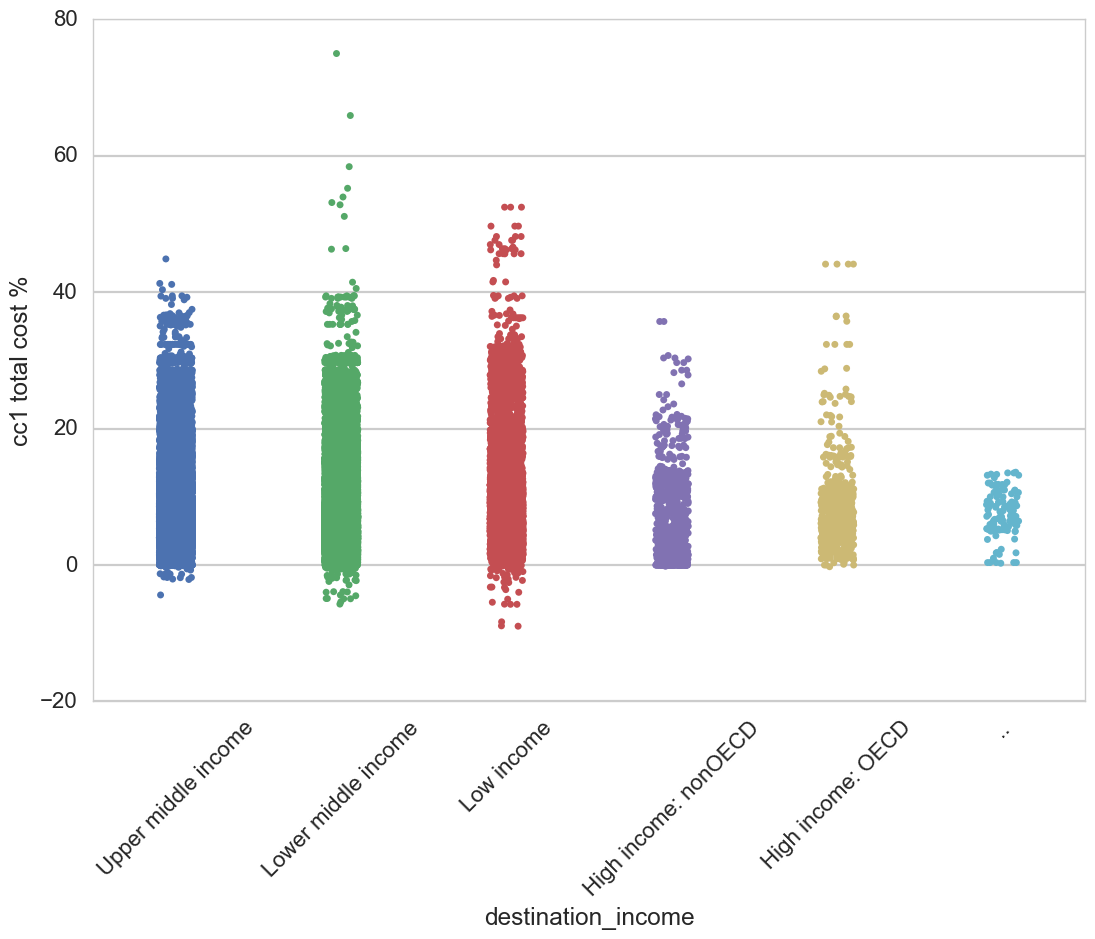

In [93]:
sns.stripplot(x="destination_income", y="cc1 total cost %", data=remit, jitter = True)
plt.xticks(rotation=45)
plt.show()

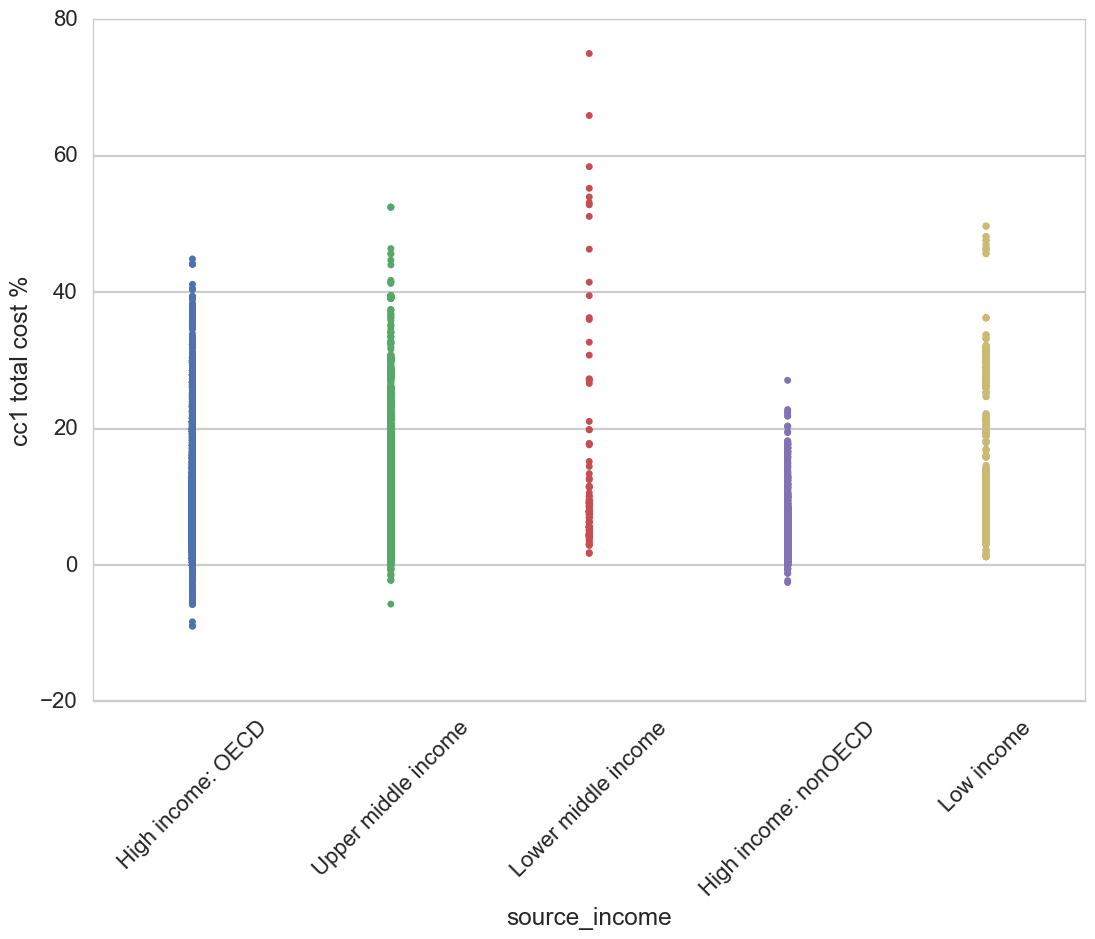

In [89]:
sns.stripplot(x="source_income", y="cc1 total cost %", data=remit)
plt.xticks(rotation=45)
plt.show()

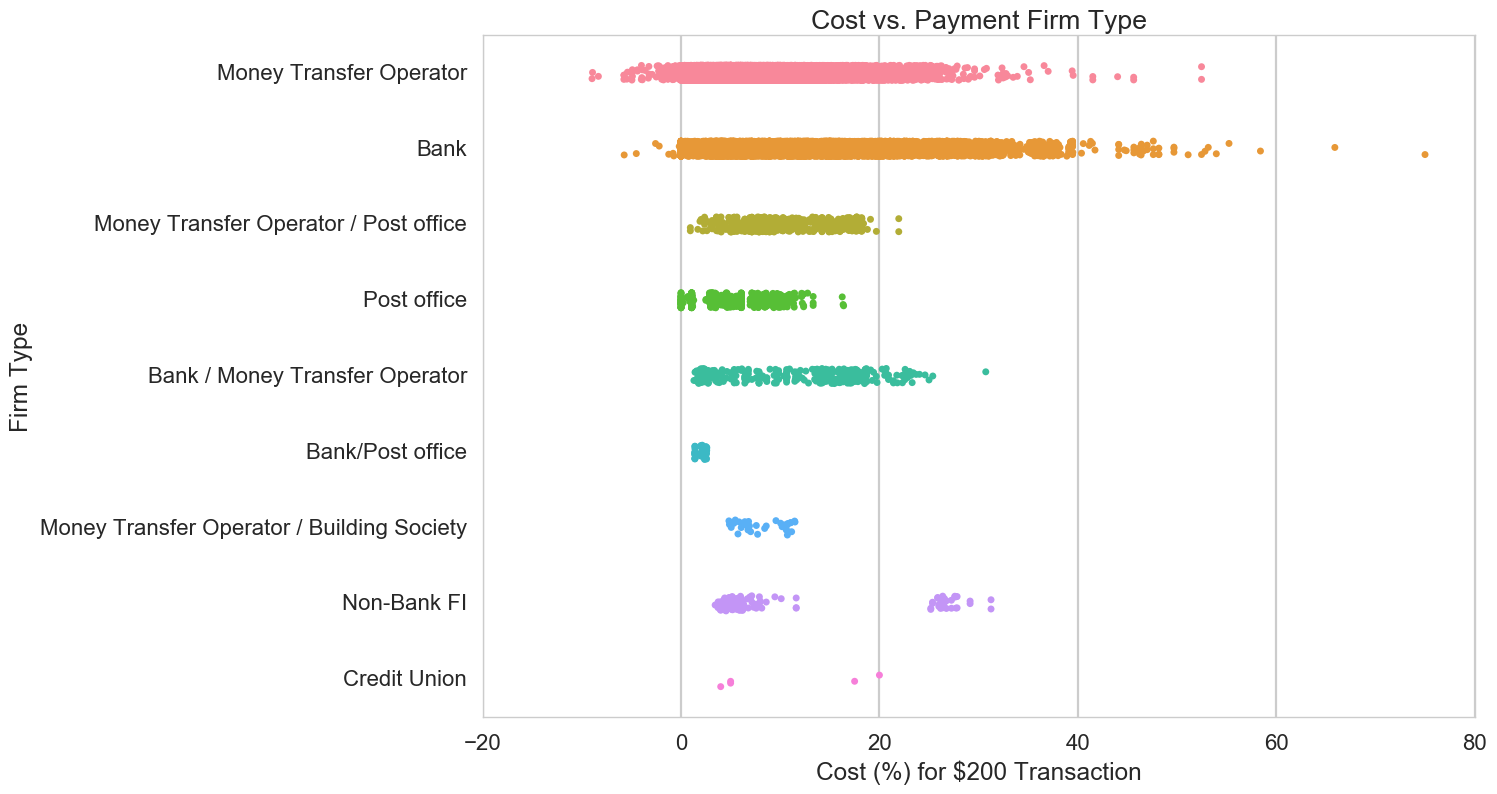

In [103]:
sns.stripplot(x="cc1 total cost %", y="firm_type", data=remit, jitter=True)
plt.xlabel("Cost (%) for $200 Transaction")
plt.ylabel("Firm Type")
plt.title("Cost vs. Payment Firm Type")